In [1]:
# import pylab as pl
from pdf2image import convert_from_path
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# jpegopt: quality progressive optimize

In [106]:
def to_pic(dpi):
    file = 'scanned/scanned_22222.pdf' # scanned/scanned_22222.pdf  scanned/scanned_11111.pdf
    qr_x1,qr_x2,qr_y1,qr_y2 = int(dpi * 6.1), int(dpi * 7.1), int(dpi * 10), int(dpi * 11)
    pages = convert_from_path(file, dpi=dpi, thread_count=1, fmt='png')
    img_file='scanned/img_temp.png'
    for page in pages:
        page.save(img_file)
        # leer el qr
        img = cv2.imread(img_file)
        qr_detect = cv2.QRCodeDetector()

        _,img_th= cv2.threshold(img,120,255,cv2.THRESH_BINARY)

        # keep only pixels that are black
        hsv_img = cv2.cvtColor(img_th, cv2.COLOR_BGR2HSV)
        lowerValues = np.array([0,0,0])
        upperValues = np.array([180,255,30])
        blackMask = cv2.inRange(hsv_img, lowerValues, upperValues)

        # blur and sharpen and repeat times X (with 3 it recognizes all 3 example qrs at 300 dpi)
        blur = cv2.GaussianBlur(blackMask, (3, 3), 0)
        sharpen = cv2.filter2D(blur, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))
        value, coordinates, qr = qr_detect.detectAndDecode(~sharpen)

        count = 0
        while qr is None:
            if count == 5:
                print('Error, QR no detectado')
                break
            blur = cv2.GaussianBlur(sharpen, (3, 3), 0)
            sharpen = cv2.filter2D(blur, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))
            value, coordinates, qr = qr_detect.detectAndDecode(~sharpen)
            count = count + 1
            print('Número de repeticiones: ',count)

        print(value, coordinates, qr)
        qr_zone = sharpen[qr_y1:qr_y2,qr_x1:qr_x2]
        plt.imshow(qr_zone)
        plt.show()
    if os.path.exists(img_file):
        os.remove(img_file)

Número de repeticiones:  1
test_qr,22222,1 [[[1892.     3101.    ]
  [2042.7262 3098.004 ]
  [2048.     3252.    ]
  [1891.0714 3252.    ]]] [[  0   0   0   0   0   0   0 255   0 255   0   0 255   0   0   0 255 255
    0   0   0   0   0   0   0]
 [  0 255 255 255 255 255   0 255 255   0   0 255   0   0   0   0   0 255
    0 255 255 255 255 255   0]
 [  0 255   0   0   0 255   0 255 255   0   0 255 255   0 255   0 255 255
    0 255   0   0   0 255   0]
 [  0 255   0   0   0 255   0 255 255 255 255 255 255 255   0   0 255 255
    0 255   0   0   0 255   0]
 [  0 255   0   0   0 255   0 255   0   0 255 255   0 255 255   0   0 255
    0 255   0   0   0 255   0]
 [  0 255 255 255 255 255   0 255   0   0 255 255 255 255 255 255 255 255
    0 255 255 255 255 255   0]
 [  0   0   0   0   0   0   0 255   0 255   0 255   0 255   0 255   0 255
    0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255   0   0 255 255   0 255   0 255
  255 255 255 255 255 255 255]
 [255   0   0   0  

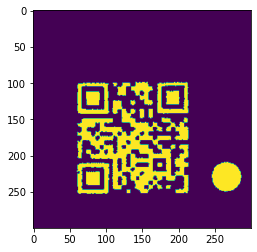

test_qr,22222,2 [[[1924.     3060.    ]
  [2074.     3057.602 ]
  [2074.     3206.9768]
  [1923.     3207.    ]]] [[  0   0   0   0   0   0   0 255   0   0   0   0 255   0   0   0 255 255
    0   0   0   0   0   0   0]
 [  0 255 255 255 255 255   0 255 255   0   0 255 255   0   0   0   0 255
    0 255 255 255 255 255   0]
 [  0 255   0   0   0 255   0 255 255 255 255 255   0   0 255   0 255 255
    0 255   0   0   0 255   0]
 [  0 255   0   0   0 255   0 255 255 255   0   0 255 255   0   0 255 255
    0 255   0   0   0 255   0]
 [  0 255   0   0   0 255   0 255   0   0   0 255   0 255 255   0   0 255
    0 255   0   0   0 255   0]
 [  0 255 255 255 255 255   0 255   0 255 255   0   0 255 255 255 255 255
    0 255 255 255 255 255   0]
 [  0   0   0   0   0   0   0 255   0 255   0 255   0 255   0 255   0 255
    0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255   0 255 255 255   0 255   0 255
  255 255 255 255 255 255 255]
 [255   0   0   0   0   0   0   0 255 255 255 

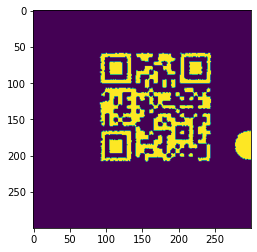

test_qr,22222,3 [[[1895.     3098.    ]
  [2045.9805 3096.    ]
  [2048.9998 3251.    ]
  [1897.     3247.    ]]] [[  0   0   0   0   0   0   0 255   0 255   0   0 255 255 255 255   0 255
    0   0   0   0   0   0   0]
 [  0 255 255 255 255 255   0 255   0 255   0   0   0   0   0 255   0 255
    0 255 255 255 255 255   0]
 [  0 255   0   0   0 255   0 255 255 255 255   0   0   0 255   0 255 255
    0 255   0   0   0 255   0]
 [  0 255   0   0   0 255   0 255 255   0 255 255   0 255 255 255   0 255
    0 255   0   0   0 255   0]
 [  0 255   0   0   0 255   0 255 255 255   0   0   0 255 255   0   0 255
    0 255   0   0   0 255   0]
 [  0 255 255 255 255 255   0 255 255 255   0   0   0 255 255   0 255 255
    0 255 255 255 255 255   0]
 [  0   0   0   0   0   0   0 255   0 255   0 255   0 255   0   0   0 255
    0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255   0   0   0 255   0   0   0 255
  255 255 255 255 255 255 255]
 [255   0 255 255 255 255   0   0   0 255 255 

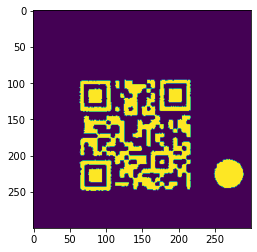

In [107]:
to_pic(300)     # recognizes all three example qrs with, 250, 260, 300(not with 270, 280, 290, 310)

In [13]:
def find_qrs(file, dpi=300):
    pages = convert_from_path(file, dpi=dpi, thread_count=1, fmt='png')
    img_file='img_temp.png'
    qrs = []
    for page in pages:
        page.save(img_file)
        img = cv2.imread(img_file)
        qr_detect = cv2.QRCodeDetector()
        # process the image
        _,img_th= cv2.threshold(img,120,255,cv2.THRESH_BINARY)
        # keep only black pixels
        hsv_img = cv2.cvtColor(img_th, cv2.COLOR_BGR2HSV)
        black_mask = cv2.inRange(hsv_img, np.array([0,0,0]), np.array([180,255,30]))
        # blur, sharpen and recognize the qr
        blur = cv2.GaussianBlur(black_mask, (3, 3), 0)
        sharpen = cv2.filter2D(blur, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))
        value, coordinates, qr = qr_detect.detectAndDecode(~sharpen)
        exam, variant, page = '','',''
        if value:
            exam, variant, page = value.split(sep=',')
        qrs.append({'exam': exam, 'variant': variant, 'page': page,'coordinates': coordinates})
        # debug
        print(value, coordinates, qr)
        # print(int(coordinates[0][0][0]),int(coordinates[0][1][0]),int(coordinates[0][0][1]),int(coordinates[0][2][1]))
        qr_zone = sharpen[int(coordinates[0][0][1] - 2):int(coordinates[0][2][1] + 2),int(coordinates[0][0][0] - 2):int(coordinates[0][1][0] + 2)]
        #qr_zone = sharpen[int(dpi * 10):int(dpi * 11),int(dpi * 6.1):int(dpi * 7.1)]
        plt.imshow(qr_zone, cmap='gray')
        plt.show()
    if os.path.exists(img_file):
        os.remove(img_file)
    return qrs

test_qr,11111,1 [[[1894.9999 3098.0002]
  [2046.6063 3098.0002]
  [2049.     3250.    ]
  [1895.     3250.    ]]] [[  0   0   0   0   0   0   0 255   0 255 255 255 255   0   0   0 255 255
    0   0   0   0   0   0   0]
 [  0 255 255 255 255 255   0 255 255   0 255   0   0   0   0   0   0 255
    0 255 255 255 255 255   0]
 [  0 255   0   0   0 255   0 255 255   0 255   0 255   0 255   0 255 255
    0 255   0   0   0 255   0]
 [  0 255   0   0   0 255   0 255 255 255   0 255   0 255   0   0 255 255
    0 255   0   0   0 255   0]
 [  0 255   0   0   0 255   0 255   0 255   0 255 255 255 255   0   0 255
    0 255   0   0   0 255   0]
 [  0 255 255 255 255 255   0 255   0 255 255   0 255 255 255 255 255 255
    0 255 255 255 255 255   0]
 [  0   0   0   0   0   0   0 255   0 255   0 255   0 255   0 255   0 255
    0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255   0   0 255   0 255   0 255   0 255
  255 255 255 255 255 255 255]
 [255   0   0   0   0   0   0   0 255   0 255 

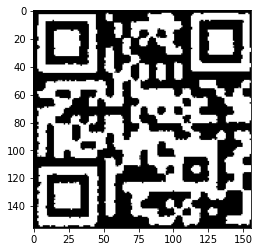

test_qr,11111,2 [[[1928.     3060.    ]
  [2078.945  3057.2483]
  [2082.     3210.    ]
  [1930.     3206.    ]]] [[  0 255 255 255   0   0   0 255 255   0 255 255 255   0   0   0 255 255
    0   0   0   0   0   0   0]
 [  0 255 255 255 255 255   0 255 255 255 255   0   0   0   0   0   0 255
    0 255 255 255 255 255   0]
 [  0 255   0   0   0 255   0 255 255 255 255   0   0   0 255   0 255 255
    0 255   0   0   0 255   0]
 [  0 255   0   0   0 255   0 255 255 255 255 255   0 255 255   0 255 255
    0 255   0   0   0 255   0]
 [  0 255   0   0   0 255   0 255   0 255 255 255 255 255 255 255   0 255
    0 255   0   0   0 255   0]
 [  0 255 255 255 255 255   0 255   0   0 255 255   0 255 255 255 255 255
    0   0 255 255 255 255   0]
 [  0   0   0   0   0   0   0 255   0 255   0 255   0 255   0 255   0 255
  255   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255   0   0   0   0 255 255 255 255 255
  255 255 255 255 255 255 255]
 [255   0   0   0   0   0   0   0   0   0   0 

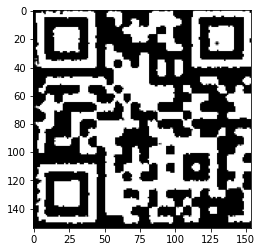

test_qr,11111,3 [[[1893.     3099.    ]
  [2045.     3099.    ]
  [2045.0001 3251.    ]
  [1893.     3251.    ]]] [[  0   0   0   0   0   0   0 255   0 255   0   0 255   0   0   0 255 255
    0   0   0   0   0   0   0]
 [  0 255 255 255 255 255   0 255 255   0 255 255   0   0   0   0   0 255
    0 255 255 255 255 255   0]
 [  0 255   0   0   0 255   0 255 255 255   0 255   0   0 255   0 255 255
    0 255   0   0   0 255   0]
 [  0 255   0   0   0 255   0 255 255 255 255 255 255 255   0   0 255 255
    0 255   0   0   0 255   0]
 [  0 255   0   0   0 255   0 255   0   0 255   0 255 255 255   0   0 255
    0 255   0   0   0 255   0]
 [  0 255 255 255 255 255   0 255   0 255   0 255   0 255 255 255 255 255
    0 255 255 255 255 255   0]
 [  0   0   0   0   0   0   0 255   0 255   0 255   0 255   0 255   0 255
    0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255   0 255 255 255   0 255   0 255
  255 255 255 255 255 255 255]
 [255   0   0   0   0   0   0   0 255   0   0 

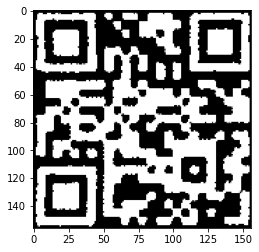

[{'exam': 'test_qr',
  'variant': '11111',
  'page': '1',
  'coordinates': array([[[1894.9999, 3098.0002],
          [2046.6063, 3098.0002],
          [2049.    , 3250.    ],
          [1895.    , 3250.    ]]], dtype=float32)},
 {'exam': 'test_qr',
  'variant': '11111',
  'page': '2',
  'coordinates': array([[[1928.    , 3060.    ],
          [2078.945 , 3057.2483],
          [2082.    , 3210.    ],
          [1930.    , 3206.    ]]], dtype=float32)},
 {'exam': 'test_qr',
  'variant': '11111',
  'page': '3',
  'coordinates': array([[[1893.    , 3099.    ],
          [2045.    , 3099.    ],
          [2045.0001, 3251.    ],
          [1893.    , 3251.    ]]], dtype=float32)}]

In [16]:
find_qrs('scanned/scanned_11111.pdf')

 [[[1891.     3100.111 ]
  [2042.7262 3098.004 ]
  [2048.     3252.    ]
  [1893.     3252.    ]]] None


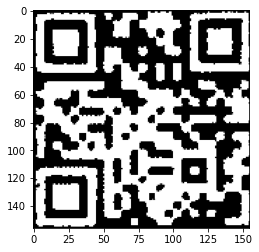

test_qr,22222,2 [[[1924.     3060.    ]
  [2074.     3057.602 ]
  [2074.     3206.9768]
  [1923.     3207.    ]]] [[  0   0   0   0   0   0   0 255   0   0   0   0 255   0   0   0 255 255
    0   0   0   0   0   0   0]
 [  0 255 255 255 255 255   0 255 255   0   0 255 255   0   0   0   0 255
    0 255 255 255 255 255   0]
 [  0 255   0   0   0 255   0 255 255 255 255 255   0   0 255   0 255 255
    0 255   0   0   0 255   0]
 [  0 255   0   0   0 255   0 255 255 255   0   0 255 255   0   0 255 255
    0 255   0   0   0 255   0]
 [  0 255   0   0   0 255   0 255   0   0   0 255   0 255 255   0   0 255
    0 255   0   0   0 255   0]
 [  0 255 255 255 255 255   0 255   0 255 255   0   0 255 255 255 255 255
    0 255 255 255 255 255   0]
 [  0   0   0   0   0   0   0 255   0 255   0 255   0 255   0 255   0 255
    0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255   0 255 255 255   0 255   0 255
  255 255 255 255 255 255 255]
 [255   0   0   0   0   0   0   0 255 255 255 

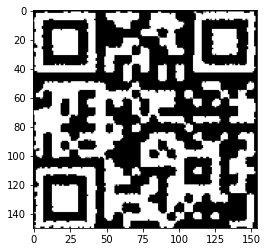

test_qr,22222,3 [[[1895.     3098.    ]
  [2045.9805 3096.    ]
  [2048.9998 3251.    ]
  [1897.     3247.    ]]] [[  0   0   0   0   0   0   0 255   0 255   0   0 255 255 255 255   0 255
    0   0   0   0   0   0   0]
 [  0 255 255 255 255 255   0 255   0 255   0   0   0   0   0 255   0 255
    0 255 255 255 255 255   0]
 [  0 255   0   0   0 255   0 255 255 255 255   0   0   0 255   0 255 255
    0 255   0   0   0 255   0]
 [  0 255   0   0   0 255   0 255 255   0 255 255   0 255 255 255   0 255
    0 255   0   0   0 255   0]
 [  0 255   0   0   0 255   0 255 255 255   0   0   0 255 255   0   0 255
    0 255   0   0   0 255   0]
 [  0 255 255 255 255 255   0 255 255 255   0   0   0 255 255   0 255 255
    0 255 255 255 255 255   0]
 [  0   0   0   0   0   0   0 255   0 255   0 255   0 255   0   0   0 255
    0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255   0   0   0 255   0   0   0 255
  255 255 255 255 255 255 255]
 [255   0 255 255 255 255   0   0   0 255 255 

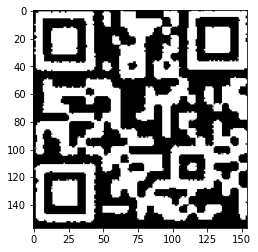

[{'exam': '',
  'variant': '',
  'page': '',
  'coordinates': array([[[1891.    , 3100.111 ],
          [2042.7262, 3098.004 ],
          [2048.    , 3252.    ],
          [1893.    , 3252.    ]]], dtype=float32)},
 {'exam': 'test_qr',
  'variant': '22222',
  'page': '2',
  'coordinates': array([[[1924.    , 3060.    ],
          [2074.    , 3057.602 ],
          [2074.    , 3206.9768],
          [1923.    , 3207.    ]]], dtype=float32)},
 {'exam': 'test_qr',
  'variant': '22222',
  'page': '3',
  'coordinates': array([[[1895.    , 3098.    ],
          [2045.9805, 3096.    ],
          [2048.9998, 3251.    ],
          [1897.    , 3247.    ]]], dtype=float32)}]

In [17]:
find_qrs('scanned/scanned_22222.pdf')

v1: reconoce los puntos del 1er qr, y el 3er qr entero

In [ ]:
def to_pic_v1(dpi):
    file = 'scanned/scanned_11111.pdf'
    qr_x1,qr_x2,qr_y1,qr_y2 = int(dpi * 6.1), int(dpi * 7.1), int(dpi * 10), int(dpi * 11)
    pages = convert_from_path(file, dpi=dpi, thread_count=1, fmt='jpg')
    for i, page in enumerate(pages):
        img_file='scanned/img_temp_%d.jpg'%i
        page.save(img_file)
        # leer el qr
        img = cv2.imread(img_file)

        _,img_th= cv2.threshold(img,80,255,cv2.THRESH_BINARY)

        gray_scale = cv2.cvtColor(img_th, cv2.COLOR_BGR2GRAY)
        hsv_img = cv2.cvtColor(img_th, cv2.COLOR_BGR2HSV)
        lowerValues = np.array([0,0,0])
        upperValues = np.array([180,255,30])
        blueMask = cv2.inRange(hsv_img, lowerValues, upperValues)

        blur = cv2.GaussianBlur(blueMask, (3, 3), 0)
        sharpen = cv2.filter2D(blur, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))
        #_,img_bin = cv2.threshold(sharpen,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        for i in range(4):
            blur = cv2.GaussianBlur(sharpen, (3, 3), 0)
            sharpen = cv2.filter2D(blur, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))

        _,img_bin = cv2.threshold(sharpen,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        img_final = img_bin

        qr_detect = cv2.QRCodeDetector()
        value, coordinates, qr = qr_detect.detectAndDecode(~img_final)
        print(value, coordinates, qr)
        qr_zone = img_final[qr_y1:qr_y2,qr_x1:qr_x2]
        plt.imshow(qr_zone)
        plt.show()

In [ ]:
to_pic_v1(300)

v2: reconoce todos los qrs

In [ ]:
def to_pic_v2(dpi):
    file = 'scanned/scanned_11111.pdf'
    qr_x1,qr_x2,qr_y1,qr_y2 = int(dpi * 6.1), int(dpi * 7.1), int(dpi * 10), int(dpi * 11)
    pages = convert_from_path(file, dpi=dpi, thread_count=1, fmt='jpg')
    for i, page in enumerate(pages):
        img_file='scanned/img_temp_%d.jpg'%i
        page.save(img_file)
        # leer el qr
        img = cv2.imread(img_file)

        _,img_th= cv2.threshold(img,120,255,cv2.THRESH_BINARY)

        gray_scale = cv2.cvtColor(img_th, cv2.COLOR_BGR2GRAY)
        hsv_img = cv2.cvtColor(img_th, cv2.COLOR_BGR2HSV)
        lowerValues = np.array([0,0,0])
        upperValues = np.array([180,255,30])
        blueMask = cv2.inRange(hsv_img, lowerValues, upperValues)

        blur = cv2.GaussianBlur(blueMask, (3, 3), 0)
        sharpen = cv2.filter2D(blur, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))
        #_,img_bin = cv2.threshold(sharpen,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        for i in range(4):
            blur = cv2.GaussianBlur(sharpen, (3, 3), 0)
            sharpen = cv2.filter2D(blur, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))

        _,img_bin = cv2.threshold(sharpen,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        img_final = img_bin

        qr_detect = cv2.QRCodeDetector()
        value, coordinates, qr = qr_detect.detectAndDecode(~img_final)
        print(value, coordinates, qr)
        qr_zone = img_final[qr_y1:qr_y2,qr_x1:qr_x2]
        plt.imshow(qr_zone)
        plt.show()

In [ ]:
to_pic_v2(300)

In [41]:
def progress_qr(file, dpi=300):
    pages = convert_from_path(file, dpi=dpi, thread_count=1, fmt='png')
    img_file='img_temp.png'
    qrs = []
    for page in pages:
        fig, axs = plt.subplots(2,3,figsize=(20,15))
        page.save(img_file)
        img = cv2.imread(img_file)
        qr_detect = cv2.QRCodeDetector()
        qr_zone = img[int(dpi * 10):int(dpi * 11),int(dpi * 6.1):int(dpi * 7.1)]
        axs[0,0].imshow(qr_zone)
        axs[0,0].set_title('raw image')
        # process the image
        _,img_th= cv2.threshold(img,120,255,cv2.THRESH_BINARY)
        qr_zone = img_th[int(dpi * 10):int(dpi * 11),int(dpi * 6.1):int(dpi * 7.1)]
        axs[0,1].imshow(qr_zone)
        axs[0,1].set_title('threshold')
        # keep only black pixels
        hsv_img = cv2.cvtColor(img_th, cv2.COLOR_BGR2HSV)
        black_mask = cv2.inRange(hsv_img, np.array([0,0,0]), np.array([180,255,30]))
        qr_zone = black_mask[int(dpi * 10):int(dpi * 11),int(dpi * 6.1):int(dpi * 7.1)]
        axs[0,2].imshow(~qr_zone, cmap='gray')
        axs[0,2].set_title('black filter')
        # blur, sharpen and recognize the qr
        blur = cv2.GaussianBlur(black_mask, (3, 3), 0)
        qr_zone = blur[int(dpi * 10):int(dpi * 11),int(dpi * 6.1):int(dpi * 7.1)]
        axs[1,0].imshow(~qr_zone, cmap='gray')
        axs[1,0].set_title('blur')
        sharpen = cv2.filter2D(blur, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))
        qr_zone = sharpen[int(dpi * 10):int(dpi * 11),int(dpi * 6.1):int(dpi * 7.1)]
        axs[1,1].imshow(~qr_zone, cmap='gray')
        axs[1,1].set_title('sharpen')
        value, coordinates, qr = qr_detect.detectAndDecode(~sharpen)
        exam, variant, page = '','',''
        if value:
            exam, variant, page = value.split(sep=',')
        qrs.append({'exam': exam, 'variant': variant, 'page': page,'coordinates': coordinates})
        s = value
        axs[1,2].text(0.1,0.5,s,dict(size=30))
        axs[1,2].set_title('value')
        plt.show()
    if os.path.exists(img_file):
        os.remove(img_file)
    return qrs

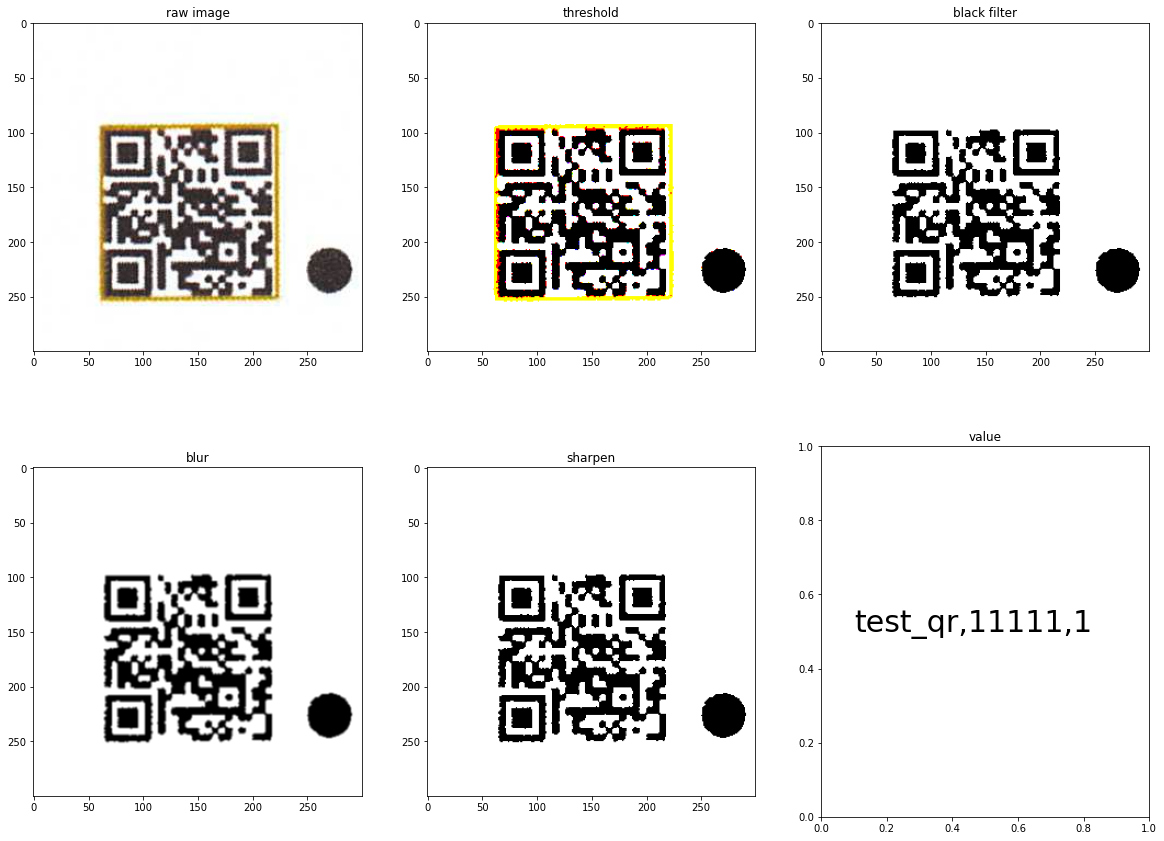

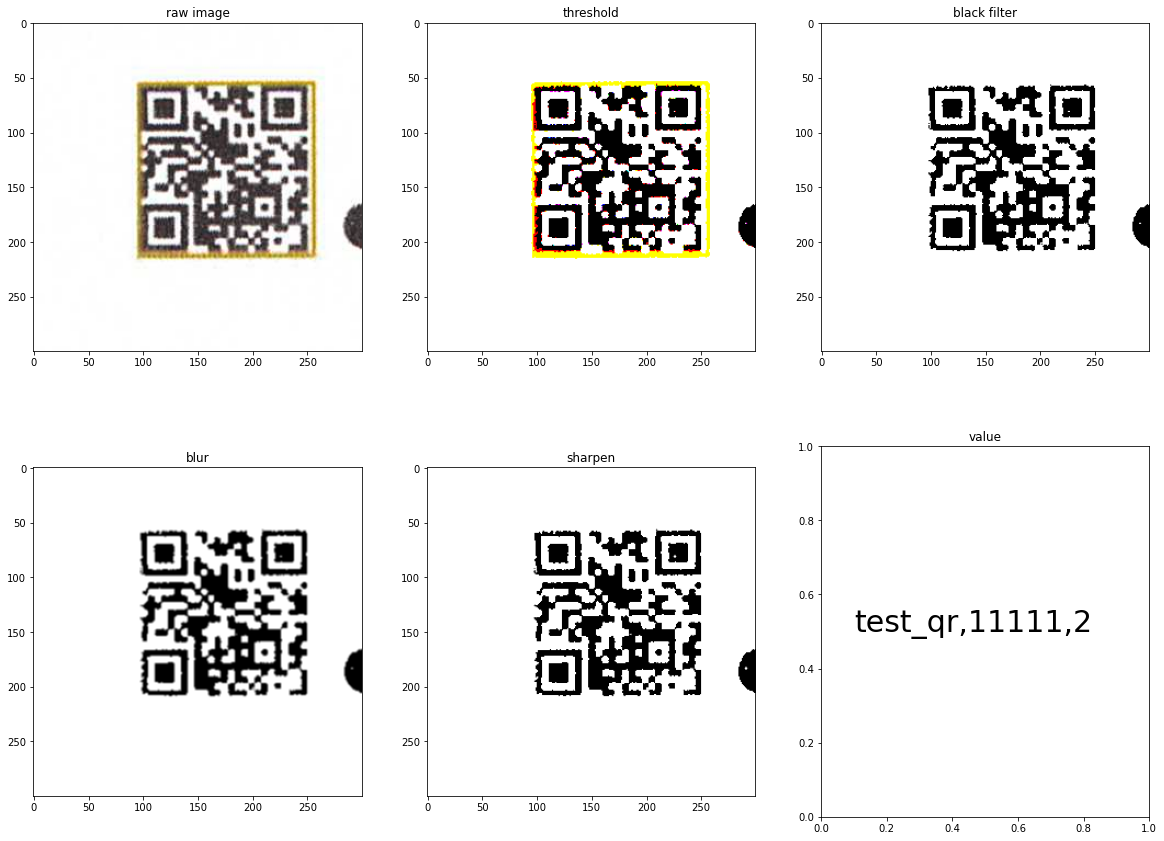

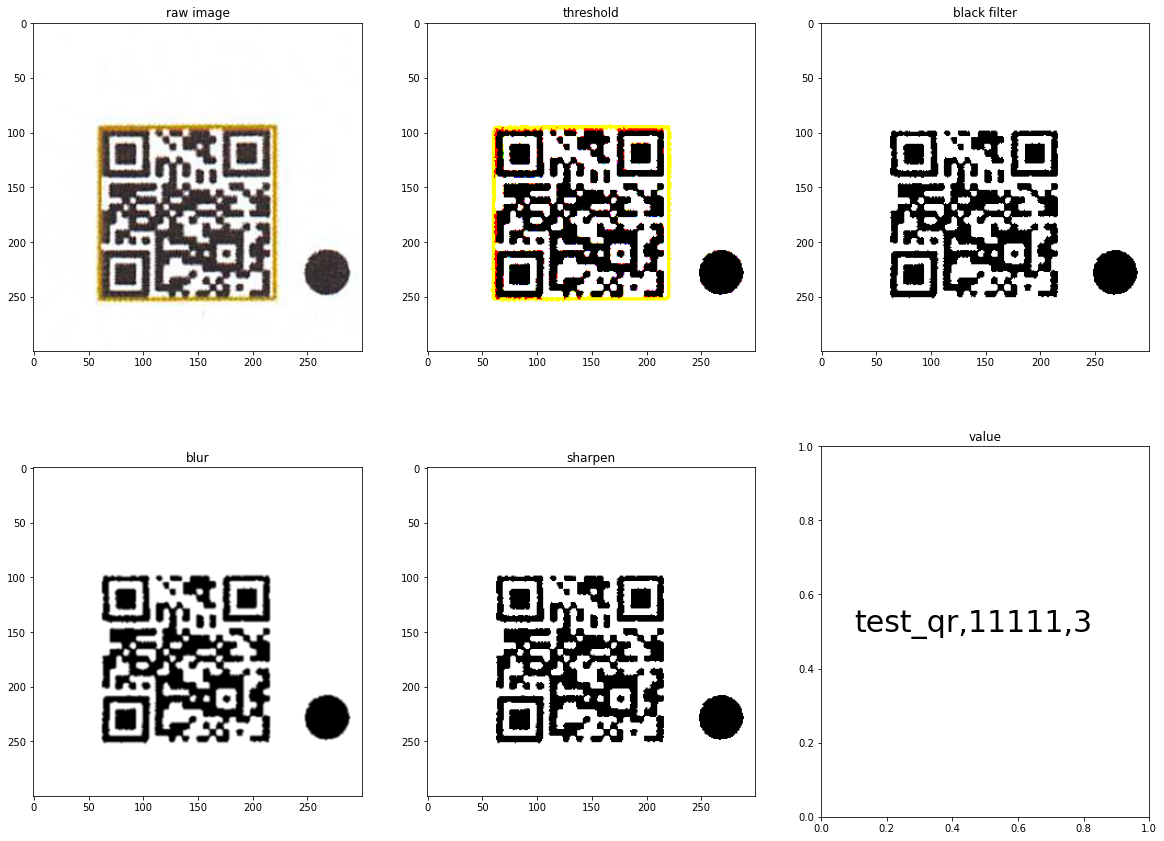

[{'exam': 'test_qr',
  'variant': '11111',
  'page': '1',
  'coordinates': array([[[1894.9999, 3098.0002],
          [2046.6063, 3098.0002],
          [2049.    , 3250.    ],
          [1895.    , 3250.    ]]], dtype=float32)},
 {'exam': 'test_qr',
  'variant': '11111',
  'page': '2',
  'coordinates': array([[[1928.    , 3060.    ],
          [2078.945 , 3057.2483],
          [2082.    , 3210.    ],
          [1930.    , 3206.    ]]], dtype=float32)},
 {'exam': 'test_qr',
  'variant': '11111',
  'page': '3',
  'coordinates': array([[[1893.    , 3099.    ],
          [2045.    , 3099.    ],
          [2045.0001, 3251.    ],
          [1893.    , 3251.    ]]], dtype=float32)}]

In [42]:
progress_qr('scanned/scanned_11111.pdf')